<a href="https://colab.research.google.com/github/LeanTavares/DataScience/blob/main/Aprova%C3%A7%C3%A3o_alunos_reglinear_simples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

O Ministério da Educação solicitou a você uma previsão do percentual de alunos que serão aprovados no ano de 2017. tendo como base o ano de 2016.
Crie um modelo que consiga prever o valor de aprovação em 2016 com as aprovações de 2015.
Faça todo tratamento de dados aprendido e faça a regressão linear com Sklearn, normalize a base de dados e analise as métricas de R^2, MAE, MSE e RMSE do modelo.

In [1]:
#montando drive para acessar o banco no drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#imports de bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [3]:
#Importe o dataframe formato xlsx
df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/aprovacao_alunos.xlsx")
#visualizando primeiras linhas de todas colunas
df.head()

,UF,ano_2015,ano_2016
0,Rondonia,77,85
1,Acre,79,81
2,Amazonas,83,85
3,Roraima,81,82
4,Para,73,76


In [4]:
#analizando tipos de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   UF        27 non-null     object
 1   ano_2015  27 non-null     int64 
 2   ano_2016  27 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 776.0+ bytes


In [5]:
#verificando mais alguns detalhes como media, moda, minimo, maximo e quartis
df.describe()

,ano_2015,ano_2016
count,27.000000,27.000000
mean,79.333333,80.185185
std,4.969136,4.820126
min,68.000000,70.000000
25%,76.000000,76.500000
50%,80.000000,81.000000
75%,81.500000,82.500000
max,89.000000,91.000000


In [6]:
#verificando correlações
df.corr()

<ipython-input-6-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,ano_2015,ano_2016
ano_2015,1.000000,0.894957
ano_2016,0.894957,1.000000


<Axes: ylabel='Count'>

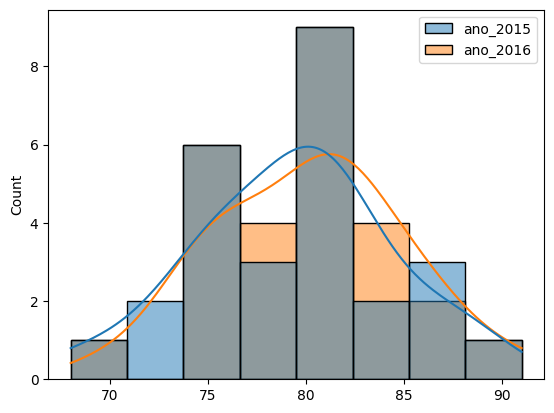

In [7]:
#verificando graficamente
sns.histplot(data=df, kde=True)

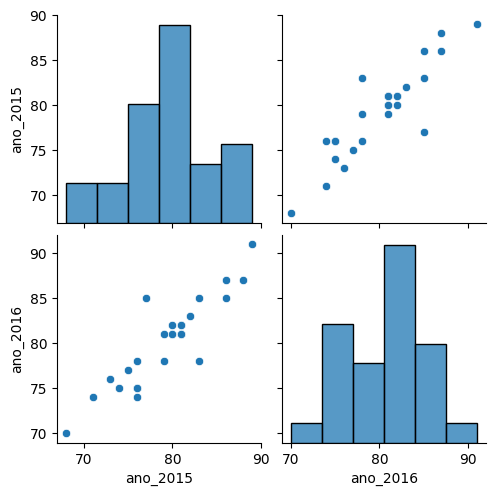

In [8]:
#plotando pairplot para verificar linearidade
sns.pairplot(df)

In [9]:
#Não seria tão necessario fazer uma normalização porém como foi pedido, será feito nesse comando com MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df.drop(columns=['UF'], inplace =True)
df_norm = pd.DataFrame(scaler.fit_transform(df), index=df.index, columns=df.columns)

In [10]:
# verificando normalização
df_norm.head()

,ano_2015,ano_2016
0,0.428571,0.714286
1,0.523810,0.523810
2,0.714286,0.714286
3,0.619048,0.571429
4,0.238095,0.285714


In [12]:
#verificando normalização
df_norm.describe()

,ano_2015,ano_2016
count,27.000000,27.000000
mean,0.539683,0.485009
std,0.236626,0.229530
min,0.000000,0.000000
25%,0.380952,0.309524
50%,0.571429,0.523810
75%,0.642857,0.595238
max,1.000000,1.000000


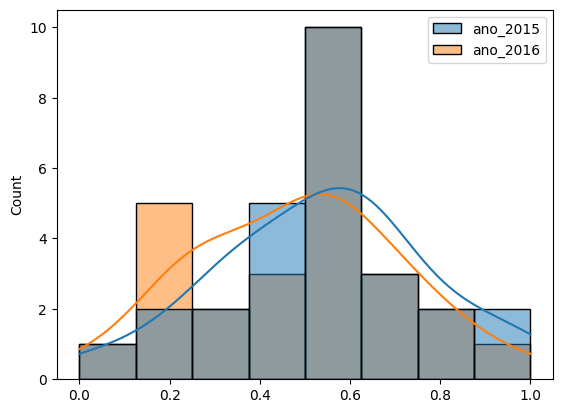

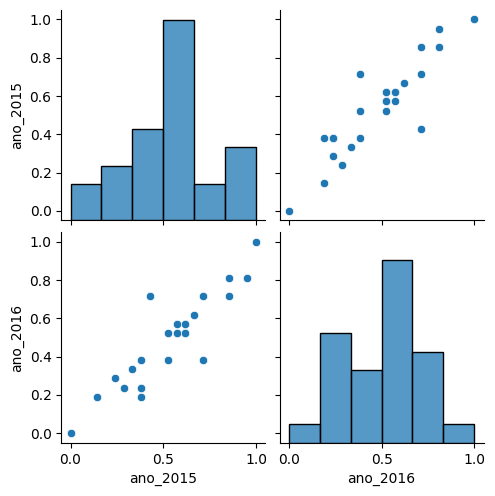

In [13]:
#verificando graficamente a normalização
sns.histplot(data=df_norm, kde=True)
sns.pairplot(df_norm)

In [26]:
#plotar a OLS
import statsmodels.formula.api as smf
#modelo MRLS
function = 'ano_2016~ano_2015-1' #previsão ~ var_explicativa e o -1 para tirar intercepto
model = smf.ols(formula=function, data=df_norm).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:               ano_2016   R-squared (uncentered):                   0.965
Model:                            OLS   Adj. R-squared (uncentered):              0.963
Method:                 Least Squares   F-statistic:                              707.2
Date:                Tue, 29 Aug 2023   Prob (F-statistic):                    2.21e-20
Time:                        03:21:17   Log-Likelihood:                          23.670
No. Observations:                  27   AIC:                                     -45.34
Df Residuals:                      26   BIC:                                     -44.04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [16]:
#definindo variaveis x e y para modelo
x = df_norm[["ano_2015"]]
y = df_norm[["ano_2016"]]

In [21]:
#Separando os dados de Treino e Teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#Criando um Objeto de Regressão Linear
lr = LinearRegression()

#Treinando o Modelo
lr.fit(x_train,y_train)

LinearRegression()

In [22]:
#visuaizando o resultado da acertividade do treino do R2
r_sq = lr.score(x_train, y_train)
print('Coeficiente de Determinação (R²):', r_sq)

Coeficiente de Determinação (R²): 0.8800910056640281


In [23]:
#Calculando MAE,MSE e RMSE do treino (quanto maiores os valores mais chances de erro)
y_pred_train = lr.predict(x_train)
print('MAE:', metrics.mean_absolute_error(y_train, y_pred_train))
print('MSE:', metrics.mean_squared_error(y_train, y_pred_train))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))

MAE: 0.06313092719197842
MSE: 0.006947385853516443
RMSE: 0.08335097991935334


In [24]:
#Calculando MAE,MSE e RMSE do test (quanto maiores os valores mais chances de erro)
y_pred = lr.predict(x_test)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.10156392395533688
MSE: 0.02234792217796548
RMSE: 0.14949221443929941
